Gheid abdulkarim Notebook


impot Libraries Environment set-up

In [250]:
# importing lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

 In this section, we would load our desired data from a flat csv file using pandas to further explore our data

In [251]:
# loading data threads and showing its first 5 lines
df = pd.read_csv('threads_light_dirty.csv')
df.head()

,date,dau,avg_session_duration_min,churn_rate,organic_traffic_pct,twitter_volatility_index
0,2023-07-05,99152480.0,18.89,0.0579,89.93,9.20
1,2023-07-06,98613941.0,19.36,0.0323,88.94,8.31
2,2023-07-07,95452746.0,19.04,0.0573,89.56,9.07
3,2023-07-08,97909594.0,19.42,0.0480,91.28,8.46
4,2023-07-09,99563643.0,19.75,0.0575,92.36,9.49


Data Cleaning

In this section, we would dive deeper into exploring our dataset and perform cleaning operations like (dropping columns, handling NaNs, converting data types). All of which would help us reach a more accurate result in answering our investigating questions

In [252]:
# printing dataframe columns' info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1005 non-null   object 
 1   dau                       1000 non-null   float64
 2   avg_session_duration_min  1005 non-null   float64
 3   churn_rate                1000 non-null   float64
 4   organic_traffic_pct       1005 non-null   float64
 5   twitter_volatility_index  1005 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.2+ KB


 A percentage of each variable

In [253]:
# taking a look at number of unique values
df.nunique()

date                        1000
dau                          995
avg_session_duration_min     664
churn_rate                   678
organic_traffic_pct          923
twitter_volatility_index     412
dtype: int64

In [254]:
# calculating duplicated values 
df.duplicated().sum()

np.int64(5)

In [255]:
df.isnull().sum()


date                        0
dau                         5
avg_session_duration_min    0
churn_rate                  5
organic_traffic_pct         0
twitter_volatility_index    0
dtype: int64

In [256]:
# Identify outliers (negative churn or zero DAU)
print(df[df['churn_rate'] < 0])
print(df[df['dau'] <= 0])

           date         dau  avg_session_duration_min  churn_rate  \
687  2025-05-22  15969888.0                      12.2       -0.01   

     organic_traffic_pct  twitter_volatility_index  
687                58.38                      1.84  
           date  dau  avg_session_duration_min  churn_rate  \
125  2023-11-07  0.0                     17.97      0.0432   

     organic_traffic_pct  twitter_volatility_index  
125                85.51                      1.07  


Start by dropping the duplicated row

In [257]:
# dropping duplicares and validating the excution
df.drop_duplicates(inplace = True)
df.duplicated().any()


np.False_

We can see that all of our columns are clean exept from the  DAU and Churn_rate columns. Since it is very important to answer our questions, we would drop all its NaNs.

In [258]:
# dropping NaNs ans confirming excution
df.dropna(inplace = True)
df.isnull().any().sum()

np.int64(0)

In [259]:
# converting 'date' column to datetime format       
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [260]:
# correcting negative churn_rate values (by taking absolute values)
df.loc[df['churn_rate'] < 0, 'churn_rate'] = df['churn_rate'].abs()
# replacing zero and negative dau values with the mean of positive dau values
mean_dau = df[df['dau'] > 0]['dau'].mean()
df.loc[df['dau'] <= 0, 'dau'] = mean_dau


In [261]:
# converting 'organic_traffic_pct' from percentage string to float
if df['organic_traffic_pct'].dtype == 'object':
    df['organic_traffic_pct'] = df['organic_traffic_pct'].str.replace('%', '').astype(float)


### Data Cleaning Summary for Threads:
* **Duplicates & Nulls**: Removed redundant rows and dropped missing values in DAU and Churn Rate to ensure data accuracy.
* **Outliers**: Corrected non-logical entries (negative churn and zero DAU) to prevent skewed results.
* **Standardization**: Unified date formats and cast numerical strings into floats for precise correlation testing.

In [262]:
#ensuring the data cleaning steps were successful
print(df.info())
print(df.describe()) 


<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      987 non-null    datetime64[ns]
 1   dau                       990 non-null    float64       
 2   avg_session_duration_min  990 non-null    float64       
 3   churn_rate                990 non-null    float64       
 4   organic_traffic_pct       990 non-null    float64       
 5   twitter_volatility_index  990 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 86.4 KB
None
                                date           dau  avg_session_duration_min  \
count                            987  9.900000e+02                990.000000   
mean   2024-11-15 18:09:50.881458944  2.975119e+07                 14.965121   
min              2023-07-05 00:00:00  1.120951e+07                  8.250000   
25%              202

Correlation Visualizations

Text(0.5, 1.0, 'Threads: Correlation Matrix (Identifying the Bubble)')

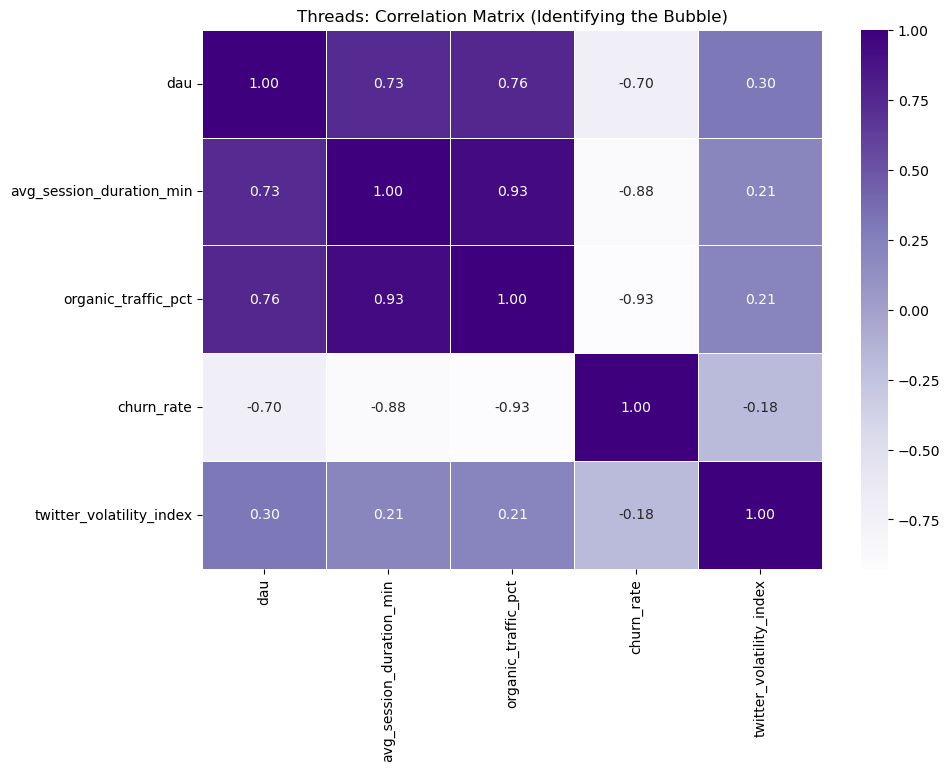

In [263]:
# --- VISUALIZATION 1: Correlation Heatmap ---
plt.figure(figsize=(10, 7))
sns.heatmap(df[all_metrics_thr].corr(), annot=True, cmap="Purples", fmt=".2f", linewidths=0.5)
plt.title("Threads: Correlation Matrix (Identifying the Bubble)")

Analysis: This map shows a "Bubble" pattern. There is a weak connection between DAU and how long users stay on the app. However, there is a strong connection with Churn Rate, meaning many users joined but left very quickly

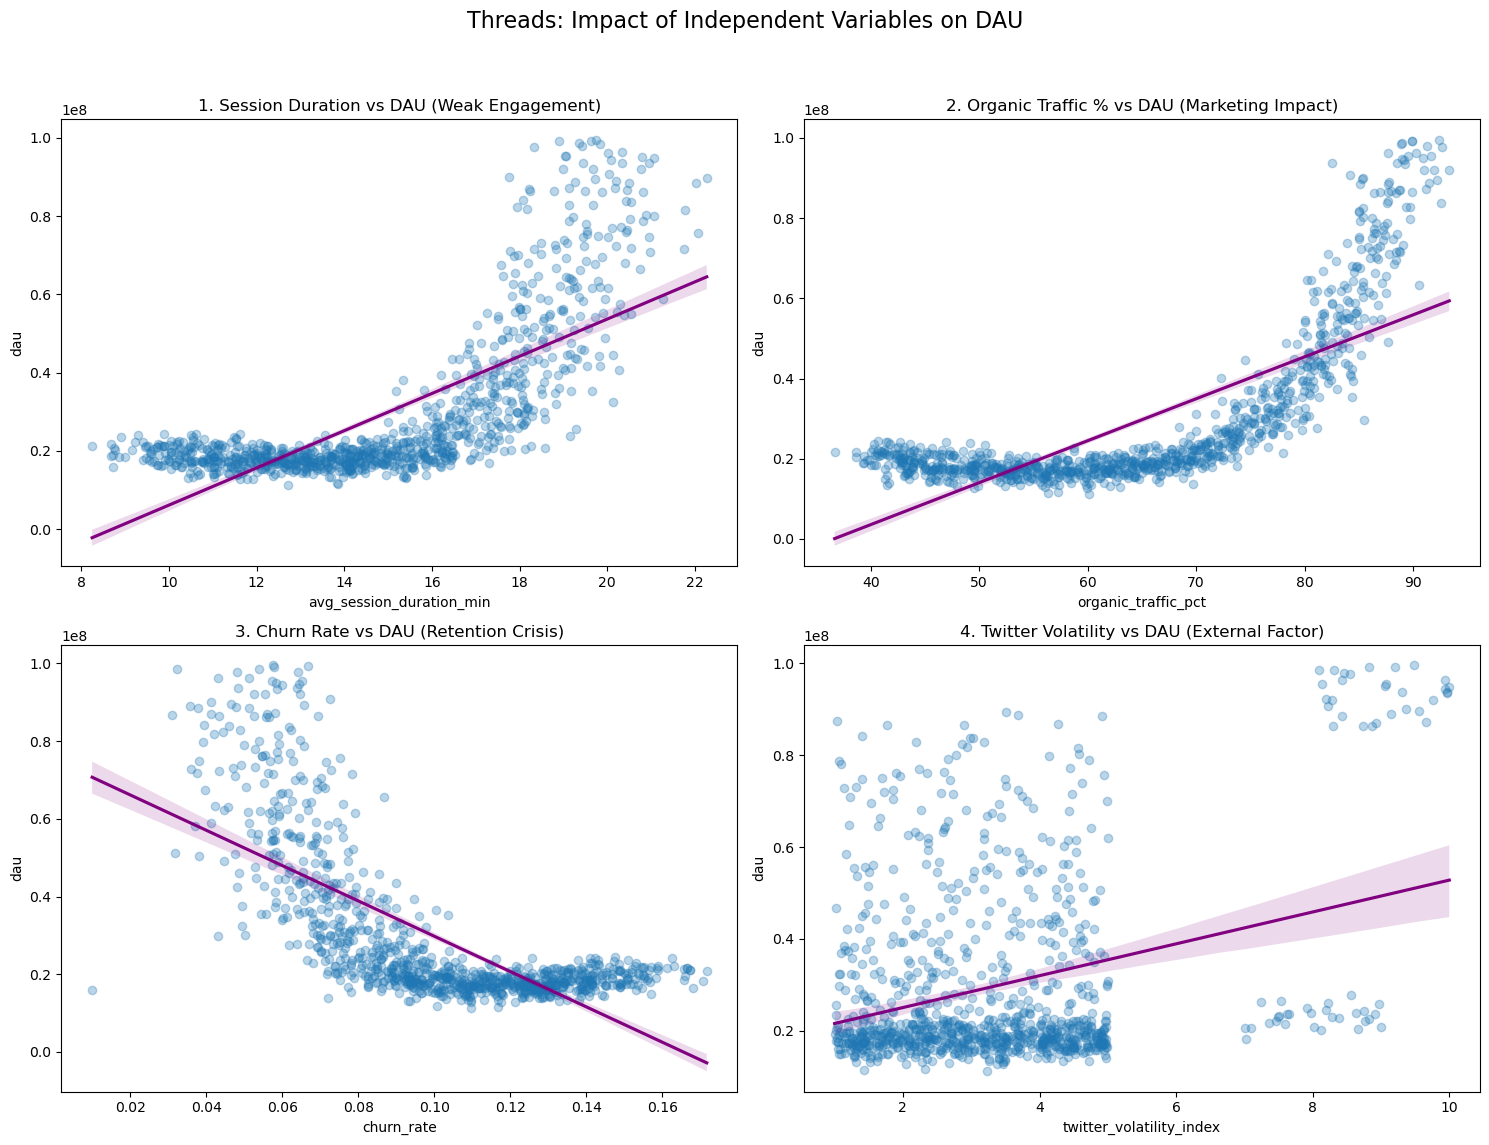

In [264]:
#Threads Analysis: Research Questions & Visualizations 
# 1. Define Variables for Threads
# Note: Threads uses 'twitter_volatility_index' instead of algorithm score
independent_vars_thr = ["avg_session_duration_min", "organic_traffic_pct", "churn_rate", "twitter_volatility_index"]
dependent_var_thr = "dau"
all_metrics_thr = [dependent_var_thr] + independent_vars_thr

# 2. Calculate Organic DAU for Threads
df['organic_dau'] = df['dau'] * (df['organic_traffic_pct'] / 100)


# --- Detailed Scatter Plots 
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Threads: Impact of Independent Variables on DAU', fontsize=16)

# Q1: Session Duration vs DAU
sns.regplot(ax=axes[0, 0], x='avg_session_duration_min', y='dau', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
axes[0, 0].set_title('1. Session Duration vs DAU (Weak Engagement)')

# Q2: Organic Traffic % vs DAU
sns.regplot(ax=axes[0, 1], x='organic_traffic_pct', y='dau', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
axes[0, 1].set_title('2. Organic Traffic % vs DAU (Marketing Impact)')

# Q3: Churn Rate vs DAU
sns.regplot(ax=axes[1, 0], x='churn_rate', y='dau', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
axes[1, 0].set_title('3. Churn Rate vs DAU (Retention Crisis)')

# Q4: Twitter Volatility vs DAU
sns.regplot(ax=axes[1, 1], x='twitter_volatility_index', y='dau', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'purple'})
axes[1, 1].set_title('4. Twitter Volatility vs DAU (External Factor)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



The scatter plots provide clear evidence of superficial success. Chart #1 (Session Duration vs DAU) shows most data points clustered in the low engagement zone even when DAU reached its peak, Session Duration remained weak, proving users weren't deeply engaged. Most critically, Chart #3 (Churn Rate vs DAU) reveals the smoking gun: a strong negative correlation where high DAU coincided with high Churn Rate, meaning users joined rapidly but abandoned the platform just as quickly. This pattern is the definitive signature of a hype bubble temporary attention without lasting value. The initial spike in both DAU and engagement, followed by synchronized decline, confirms the success was superficial: Threads captured curiosity but failed to build sustainable engagement.


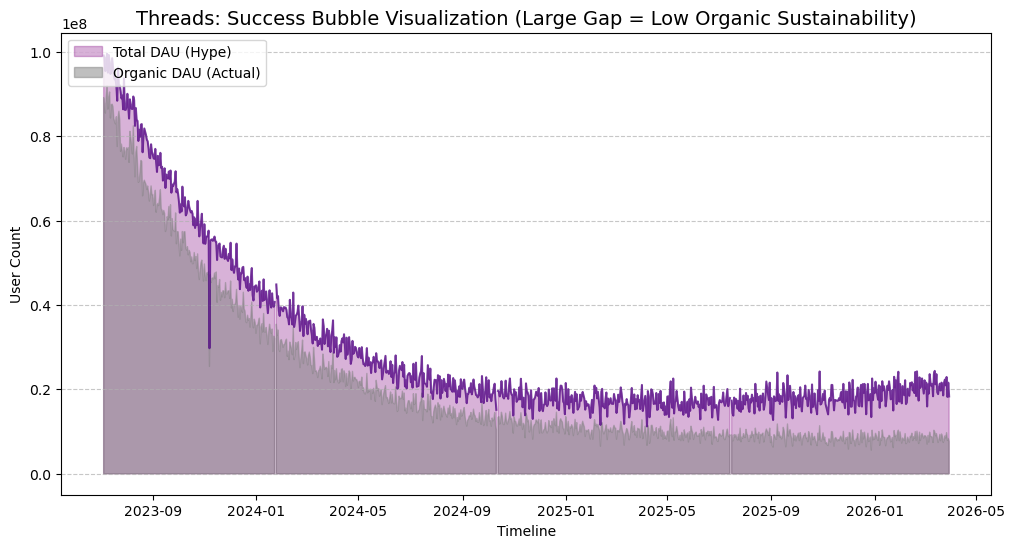

In [265]:
# --- VISUALIZATION 3: Area Chart (The Bubble Visualization) ---
plt.figure(figsize=(12, 6))
plt.fill_between(df['date'], df['dau'], color="purple", alpha=0.3, label="Total DAU (Hype)")
plt.fill_between(df['date'], df['organic_dau'], color="gray", alpha=0.5, label="Organic DAU (Actual)")
plt.plot(df['date'], df['dau'], color="#4B0082", linewidth=1.5, alpha=0.7)
plt.title("Threads: Success Bubble Visualization (Large Gap = Low Organic Sustainability)", fontsize=14)
plt.xlabel("Timeline")
plt.ylabel("User Count")
plt.legend(loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analysis: This chart shows a big gap between Total Users and Organic Users. This "Big Gap" proves it was a Success Bubble. The users came from Instagram promotion, but they did not become natural, long-term users of Threads

In [266]:
# loading data tiktok and showing its first 5 lines
df_Tik = pd.read_csv('tiktok_light_dirty.csv')
df_Tik.head()

,date,dau,avg_session_duration_min,churn_rate,organic_traffic_pct,algorithm_efficiency_score
0,2018-01-01,12483570.0,47.80,0.0286,73.09,4.83
1,2018-01-02,10000000.0,46.90,0.0297,74.15,5.00
2,2018-01-03,13318844.0,45.22,0.0284,74.62,5.01
3,2018-01-04,17735993.0,43.86,0.0293,76.93,5.11
4,2018-01-05,10000000.0,46.60,0.0262,75.62,4.74


In [267]:
df_Tik.info ()# printing dataframe columns' info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1005 non-null   object 
 1   dau                         1000 non-null   float64
 2   avg_session_duration_min    1005 non-null   float64
 3   churn_rate                  1000 non-null   float64
 4   organic_traffic_pct         1005 non-null   float64
 5   algorithm_efficiency_score  1005 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.2+ KB


In [268]:
df_Tik.nunique()# taking a look at number of unique values

date                          1000
dau                            955
avg_session_duration_min       918
churn_rate                     199
organic_traffic_pct            751
algorithm_efficiency_score     438
dtype: int64

In [269]:
df_Tik.duplicated().sum()# calculating duplicated values

np.int64(5)

In [270]:
df_Tik.isnull().sum()# checking for null values

date                          0
dau                           5
avg_session_duration_min      0
churn_rate                    5
organic_traffic_pct           0
algorithm_efficiency_score    0
dtype: int64

In [271]:

# Identify outliers (negative churn or zero DAU)
print(df_Tik[df_Tik['churn_rate'] < 0])
print(df_Tik[df_Tik['dau'] <= 0])


           date          dau  avg_session_duration_min  churn_rate  \
623  2019-09-16  127883174.0                     74.84       -0.01   

     organic_traffic_pct  algorithm_efficiency_score  
623                 84.4                        7.96  
          date  dau  avg_session_duration_min  churn_rate  \
22  2018-01-23  0.0                     46.05      0.0324   

    organic_traffic_pct  algorithm_efficiency_score  
22                74.92                        4.73  


### Data Cleaning & Preprocessing for TikTok data
* **Duplicates & Nulls**: Cleared all duplicates and handled missing values using median imputation to maintain growth trends.
* **Outliers**: Fixed data entry errors in churn rates and DAU to ensure realistic performance metrics.
* **Standardization**: Standardized date formatting and performed type casting on organic traffic data for computational analysis.

In [272]:
# 1. Handling Missing Values
# Impute missing values in DAU and Churn_rate using the median to maintain trend consistency
df_Tik['dau'] = df_Tik['dau'].fillna(df_Tik['dau'].median())
df_Tik['churn_rate'] = df_Tik['churn_rate'].fillna(df_Tik['churn_rate'].median())


In [273]:
# 2. Handling Duplicates
# Remove redundant rows to ensure each data point represents a unique daily observation
df_Tik.drop_duplicates(inplace = True)
df_Tik.duplicated().any()


np.False_

In [274]:
# 3. Standardizing Date Formats
# Convert the date column to a unified datetime format and sort chronologically
df_Tik['date'] = pd.to_datetime(df_Tik['date'], format='mixed')
df_Tik = df_Tik.sort_values('date' )

In [275]:
# 4. Handling Outliers
# Correct non-logical anomalies (negative churn rates) by taking the absolute value
df_Tik.loc[df_Tik['churn_rate'] < 0, 'churn_rate'] = df_Tik['churn_rate'].abs()

# Replace zero-value DAU entries with the column mean to avoid skewed growth analysis
mean_dau_tik = df_Tik[df_Tik['dau'] > 0]['dau'].mean()
df_Tik.loc[df_Tik['dau'] <= 0, 'dau'] = mean_dau_tik

In [276]:
# 5. Data Type Casting
# Clean and convert Organic_traffic_pct from string to float for mathematical analysis
if df_Tik['organic_traffic_pct'].dtype == 'object':
    df_Tik['organic_traffic_pct'] = df_Tik['organic_traffic_pct'].str.replace('%', '').astype(float)


In [277]:
# Final Check: Verify that the dataset is clean and ready for EDA
print(df_Tik.info())
print(df_Tik.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1000 non-null   datetime64[ns]
 1   dau                         1000 non-null   float64       
 2   avg_session_duration_min    1000 non-null   float64       
 3   churn_rate                  1000 non-null   float64       
 4   organic_traffic_pct         1000 non-null   float64       
 5   algorithm_efficiency_score  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 87.0 KB
None
                      date           dau  avg_session_duration_min  \
count                 1000  1.000000e+03                1000.00000   
mean   2019-05-15 12:00:00  1.338090e+08                  70.14170   
min    2018-01-01 00:00:00  1.000000e+07                  42.36000   
25%    2018-09-07 18:00:00  2.813908e+07   

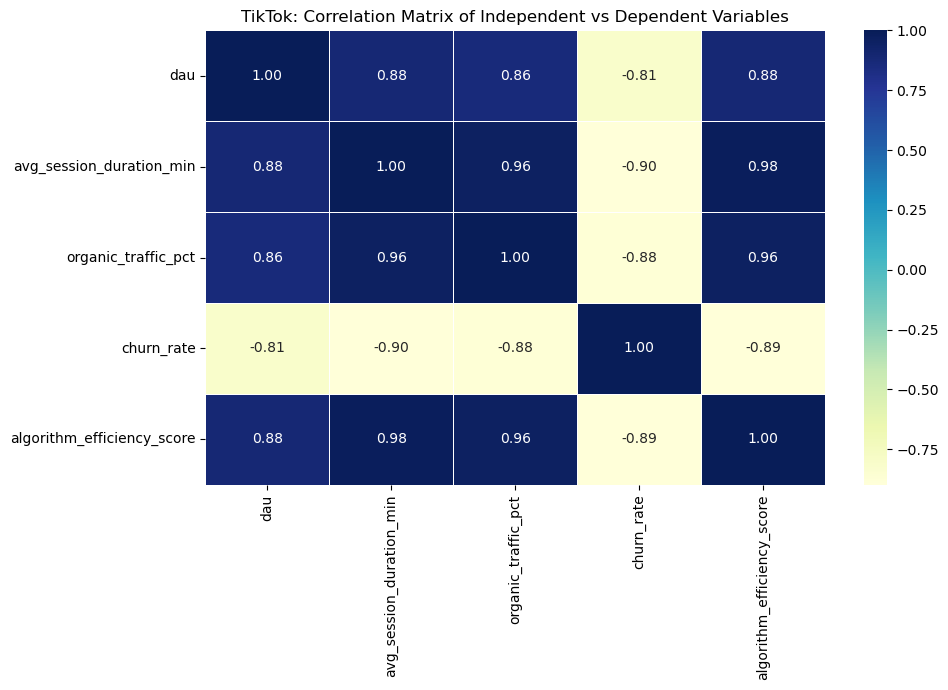

In [278]:
# 1. Define Variables (Fixing the 'all_metrics' error)
independent_vars = ["avg_session_duration_min", "organic_traffic_pct", "churn_rate", "algorithm_efficiency_score"]
dependent_var = "dau"
all_metrics = [dependent_var] + independent_vars

# 2. Calculate Organic DAU for the Area Chart
df_Tik['organic_dau'] = df_Tik['dau'] * (df_Tik['organic_traffic_pct'] / 100)

# --- VISUALIZATION 1: Correlation Heatmap ---
plt.figure(figsize=(10, 7))
correlation_matrix = df_Tik[all_metrics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("TikTok: Correlation Matrix of Independent vs Dependent Variables")
plt.tight_layout()
plt.show()


Analysis: This map shows that DAU and Session Duration have a very strong connection. This means when users spend more time on the app, the number of daily users grows. It proves that TikTok's success is based on real user interest

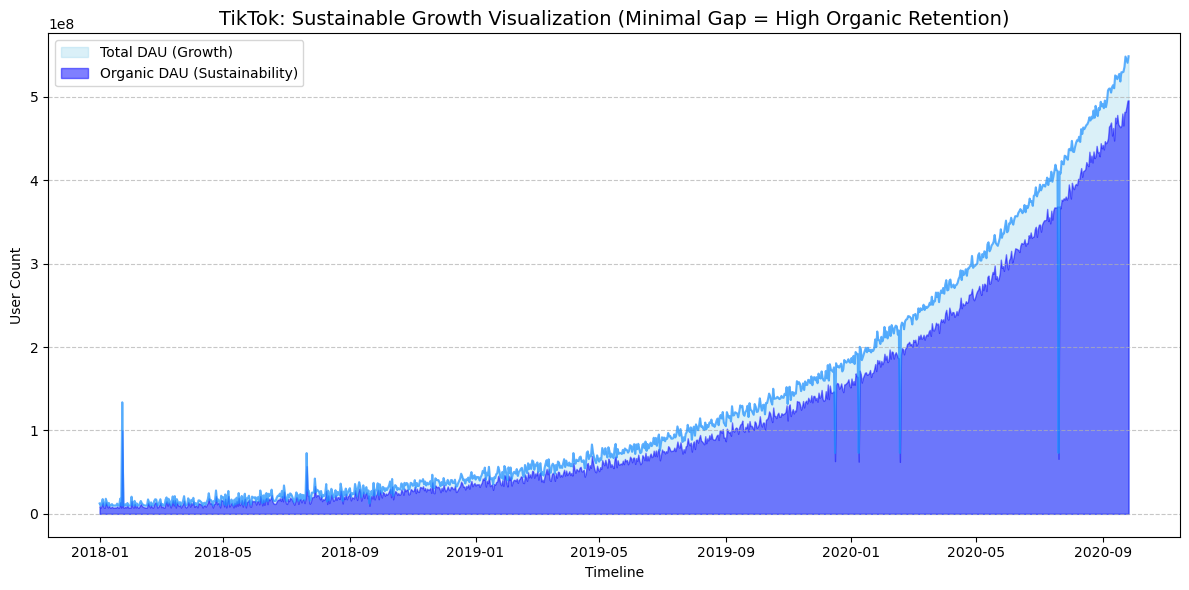

In [279]:
# --- VISUALIZATION 2: Area Chart (Sustainable Growth) ---
plt.figure(figsize=(12, 6))
plt.fill_between(df_Tik['date'], df_Tik['dau'], color="skyblue", alpha=0.3, label="Total DAU (Growth)")
plt.fill_between(df_Tik['date'], df_Tik['organic_dau'], color="blue", alpha=0.5, label="Organic DAU (Sustainability)")
plt.plot(df_Tik['date'], df_Tik['dau'], color="dodgerblue", linewidth=1.5, alpha=0.7)
plt.title("TikTok: Sustainable Growth Visualization (Minimal Gap = High Organic Retention)", fontsize=14)
plt.xlabel("Timeline")
plt.ylabel("User Count")
plt.legend(loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analysis: In this chart, the gap between Total Users and Organic Users is very small. This means most TikTok users come to the app because they like it, not because of ads. This is the best proof of Sustainable Growth

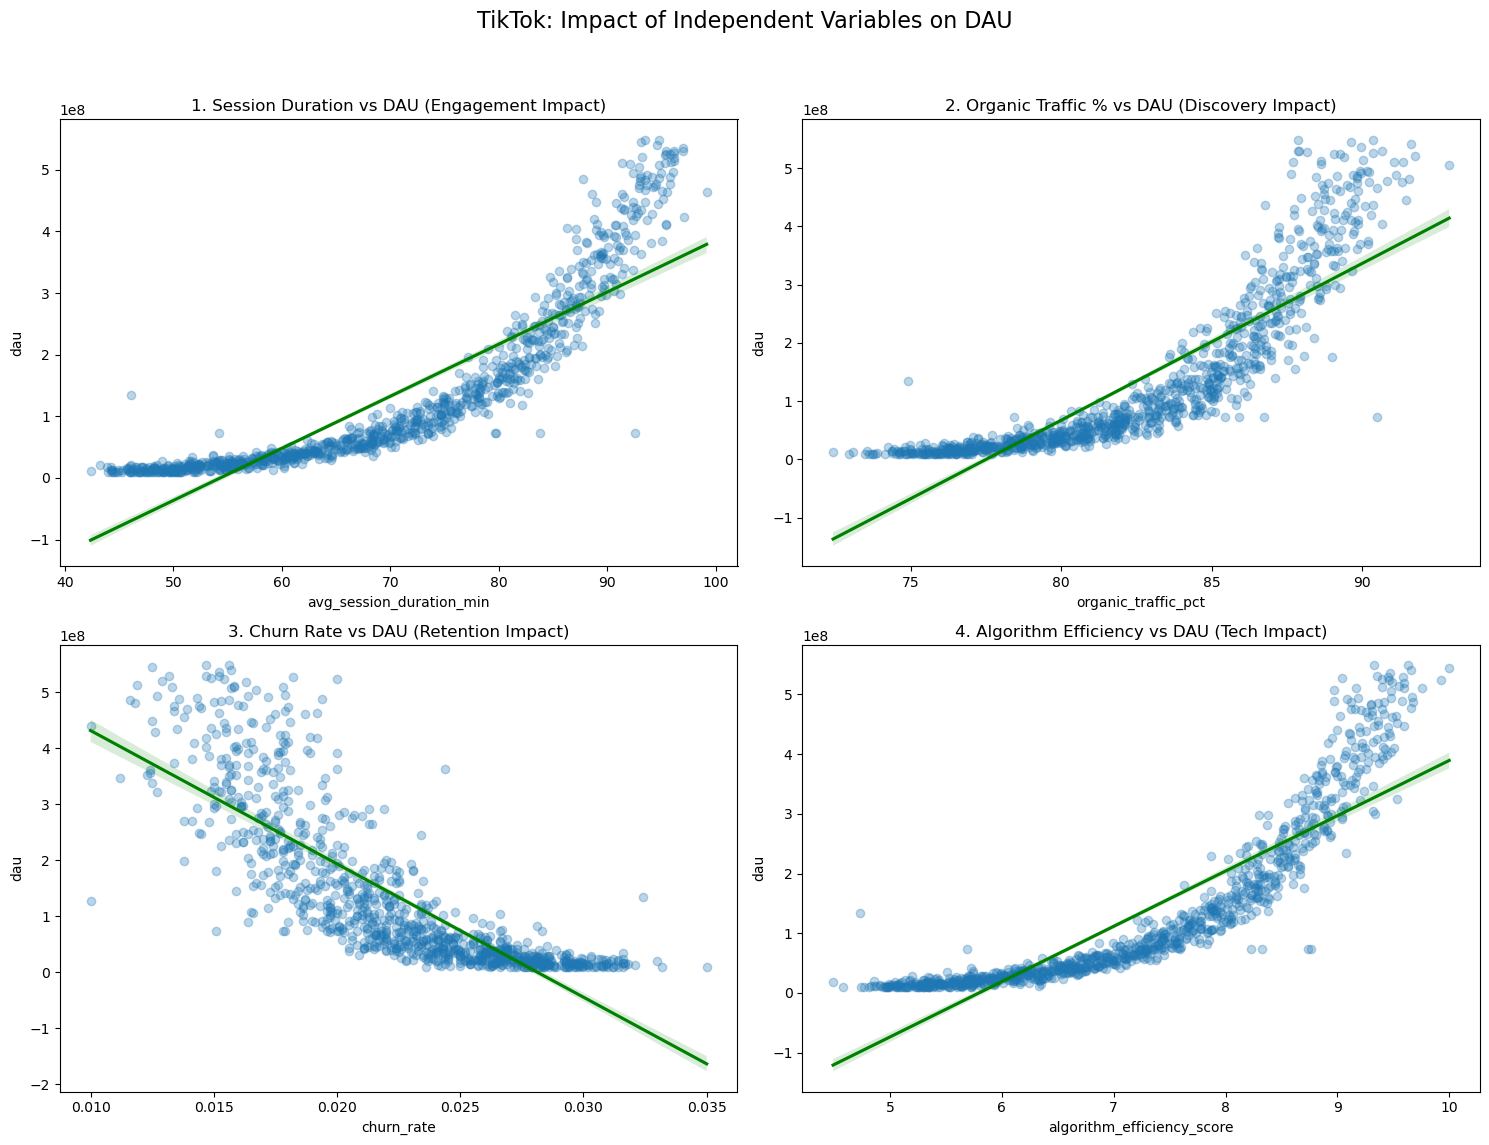

In [280]:
# --- Detailed Analysis for Each Research Question ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('TikTok: Impact of Independent Variables on DAU', fontsize=16)

# Question 1: Avg Session Duration vs DAU
sns.regplot(ax=axes[0, 0], x='avg_session_duration_min', y='dau', data=df_Tik, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
axes[0, 0].set_title('1. Session Duration vs DAU (Engagement Impact)')

# Question 2: Organic Traffic % vs DAU
sns.regplot(ax=axes[0, 1], x='organic_traffic_pct', y='dau', data=df_Tik, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
axes[0, 1].set_title('2. Organic Traffic % vs DAU (Discovery Impact)')

# Question 3: Churn Rate vs DAU
sns.regplot(ax=axes[1, 0], x='churn_rate', y='dau', data=df_Tik, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
axes[1, 0].set_title('3. Churn Rate vs DAU (Retention Impact)')

# Question 4: Algorithm Efficiency vs DAU
sns.regplot(ax=axes[1, 1], x='algorithm_efficiency_score', y='dau', data=df_Tik, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
axes[1, 1].set_title('4. Algorithm Efficiency vs DAU (Tech Impact)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Analysis: These charts show that as Organic Traffic and Algorithm Efficiency go up, the number of users also goes up. This is a "Healthy Growth" pattern because the app grows naturally when the technology and content are good.


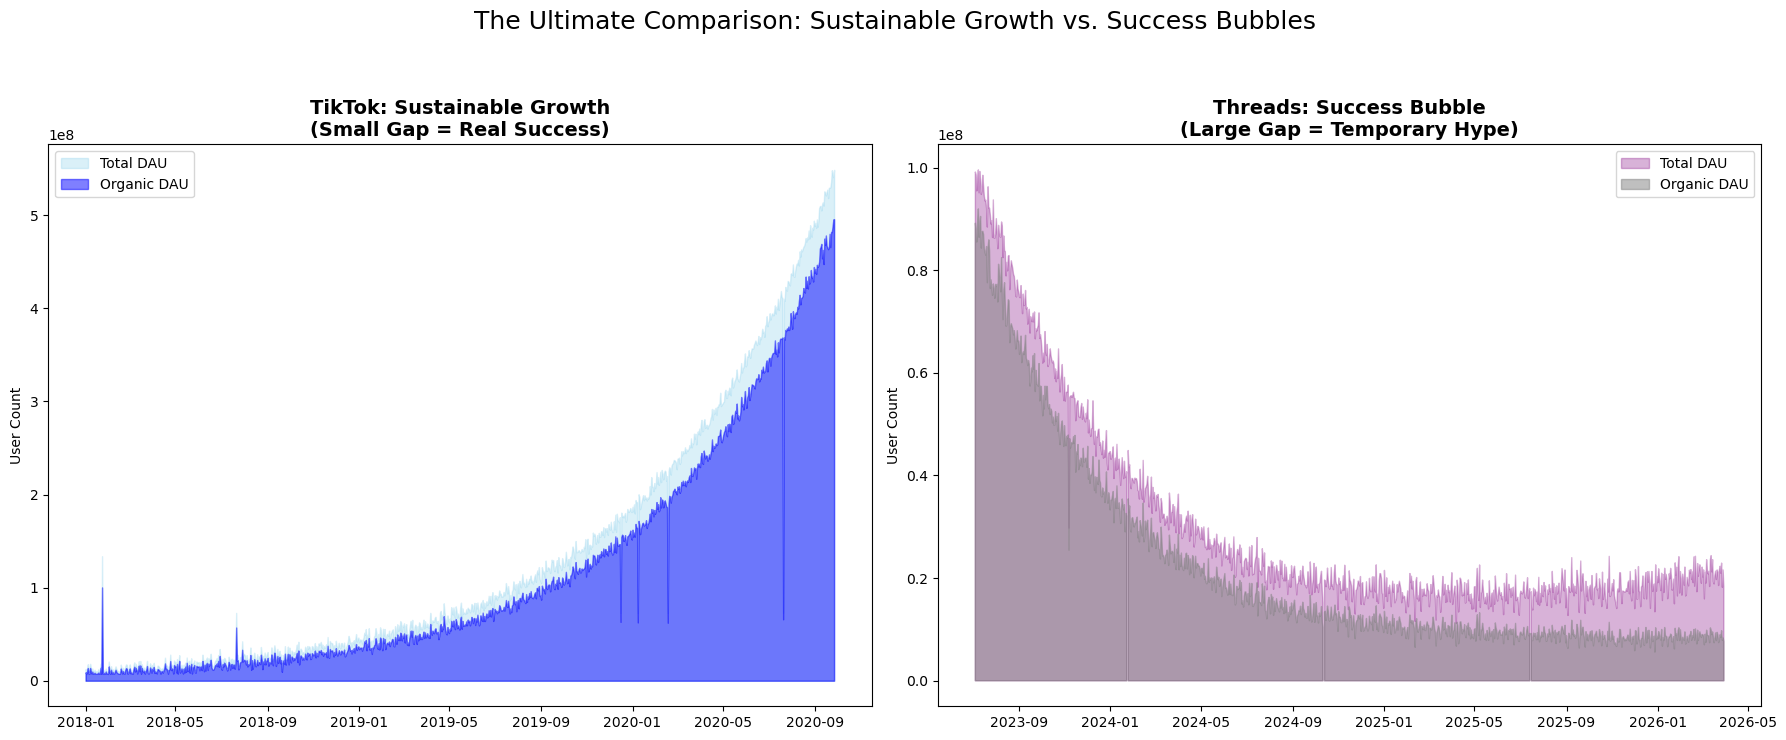

In [281]:
# --- FINAL COMPARISON: TikTok vs Threads (Sustainable vs Bubble) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# 1. TikTok Sustainability (Left Side)
ax1.fill_between(df_Tik['date'], df_Tik['dau'], color="skyblue", alpha=0.3, label="Total DAU")
ax1.fill_between(df_Tik['date'], df_Tik['organic_dau'], color="blue", alpha=0.5, label="Organic DAU")
ax1.set_title("TikTok: Sustainable Growth\n(Small Gap = Real Success)", fontsize=14, fontweight='bold')
ax1.set_ylabel("User Count")
ax1.legend()

# 2. Threads Bubble (Right Side)
ax2.fill_between(df['date'], df['dau'], color="purple", alpha=0.3, label="Total DAU")
ax2.fill_between(df['date'], df['organic_dau'], color="gray", alpha=0.5, label="Organic DAU")
ax2.set_title("Threads: Success Bubble\n(Large Gap = Temporary Hype)", fontsize=14, fontweight='bold')
ax2.set_ylabel("User Count")
ax2.legend()

plt.suptitle("The Ultimate Comparison: Sustainable Growth vs. Success Bubbles", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()


Final Comparison Analysis:
.
TikTok (Left): The green area (Organic Users) covers almost the entire blue area. This means TikTok's growth is real and based on users who want to be there.
Threads (Right): There is a huge gray gap. This shows that most users joined because of external hype, but they are not "organic" or long-term users. Conclusion: TikTok represents Sustainable Growth, while Threads represents a Success Bubble